In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
# 데이터셋 불러오기
df = pd.read_csv(r'C:\skproject\pyproject\20250620_143716_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# 결측치가 많은 열 삭제
df = df.dropna(axis=1, thresh=len(df)*0.5)  # 결측치가 50% 이상이면 삭제

# LotFrontage는 평균값으로 대체
if 'LotFrontage' in df.columns:
    df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_27760\1854943686.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)


In [24]:
# Id 열 제거
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

In [25]:
# 범주형 데이터 원핫 인코딩
df = pd.get_dummies(df)

In [26]:
# SalePrice를 타겟, 나머지를 입력
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [27]:
#학습, 테스트 데이터를 8:2 비율로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [29]:
# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE(평균 절대 오차): {mae:.2f}')
print(f'MSE(평균 제곱 오차): {mse:.2f}')
print(f'RMSE(평균 제곱근 오차): {rmse:.2f}')
print(f'R2(결정계수): {r2:.4f}')

MAE(평균 절대 오차): 26658.34
MSE(평균 제곱 오차): 1608868690.29
RMSE(평균 제곱근 오차): 40110.71
R2(결정계수): 0.7902


In [32]:
# 평가 지표 해석
print('\n[평가 해석]')
print(f'- MAE: 예측값과 실제값의 평균 오차 (값이 작을수록 정확)')
print(f'- RMSE: 예측값과 실제값의 평균적인 오차 (단위: 원본과 같음)')
print(f'- R2: 1에 가까울수록 예측력 높음')


[평가 해석]
- MAE: 예측값과 실제값의 평균 오차 (값이 작을수록 정확)
- RMSE: 예측값과 실제값의 평균적인 오차 (단위: 원본과 같음)
- R2: 1에 가까울수록 예측력 높음


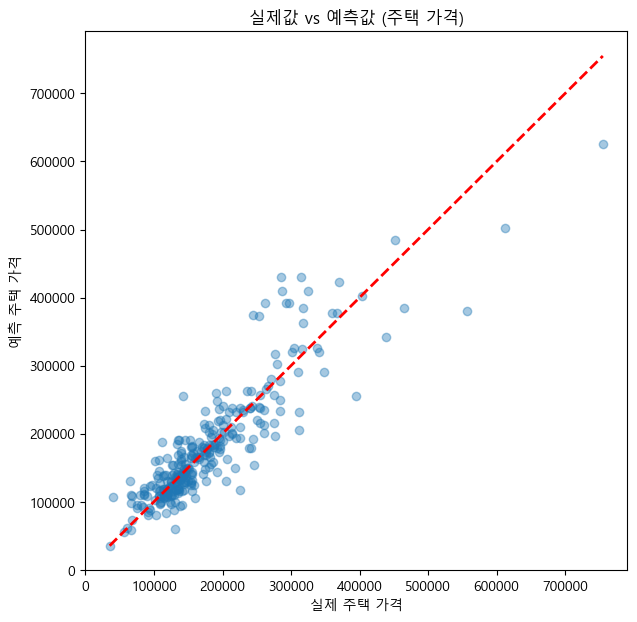

In [31]:
#성능 시각화
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 주택 가격')
plt.ylabel('예측 주택 가격')
plt.title('실제값 vs 예측값 (주택 가격)')
plt.show()